In [1]:
from Regression import Regression
from Franke import FrankeCentered, FrankeCenteredNoise

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import Lasso
import scipy.stats
import time
from imageio import imread
from tqdm import tqdm, trange

mpl.style.use("seaborn-darkgrid")
mpl.rcParams["image.cmap"] = "gnuplot2"
mpl.rcParams['figure.figsize'] = [6.0, 6.0]
mpl.rcParams["font.size"] = 14

np.random.seed(1942)

# Setup

In [2]:
x, y = np.linspace(-0.5, 0.5, 301), np.linspace(-0.5, 0.5, 201)
reg = Regression()
reg.generate_generic_data(x, y, FrankeCenteredNoise)

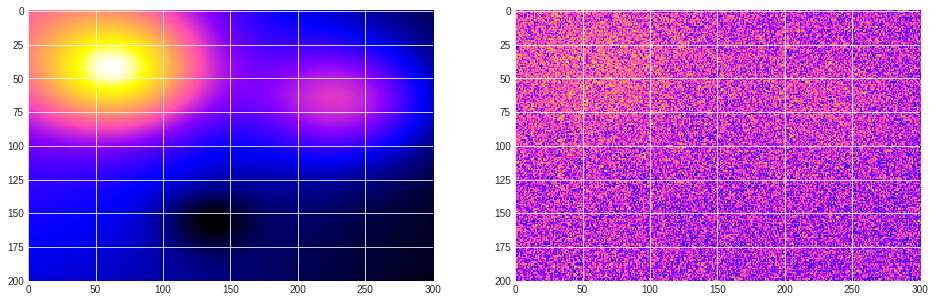

In [3]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))
franke_noiseless = FrankeCentered(reg.x_mesh, reg.y_mesh)
ax1.imshow(franke_noiseless);
ax2.imshow(reg.f);

In [4]:
data_pred = reg.solveKFold(K=10, poly_order=5, solver="OLS")

Cond of XT*X:  741485.2779964444
cond XT*X:  741485.2779964444
Cond of XT*X:  741855.5044692901
cond XT*X:  741855.5044692901
Cond of XT*X:  740996.4100528028
cond XT*X:  740996.4100528028
Cond of XT*X:  741748.7532999123
cond XT*X:  741748.7532999123
Cond of XT*X:  740759.6509461234
cond XT*X:  740759.6509461234
Cond of XT*X:  739392.8775129344
cond XT*X:  739392.8775129344
Cond of XT*X:  742032.9164816013
cond XT*X:  742032.9164816013
Cond of XT*X:  739813.37991795
cond XT*X:  739813.37991795
Cond of XT*X:  740803.4219977909
cond XT*X:  740803.4219977909
Cond of XT*X:  740603.2927030396
cond XT*X:  740603.2927030396


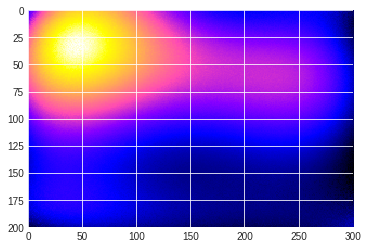

In [5]:
plt.imshow(data_pred)

In [6]:
data_pred_list = []
for i in trange(1, 9):
    K = 2**i
    data_pred = reg.solveKFold(K=K, poly_order=5, solver="OLS")
    data_pred_list.append(data_pred)

 12%|█▎        | 1/8 [00:00<00:00,  8.27it/s]

Cond of XT*X:  733966.6679245908
cond XT*X:  733966.6679245908
Cond of XT*X:  749649.462836731
cond XT*X:  749649.462836731
Cond of XT*X:  742855.357381109
cond XT*X:  742855.357381109
Cond of XT*X:  741679.0985793846
cond XT*X:  741679.0985793846
Cond of XT*X:  743432.9904302275
cond XT*X:  743432.9904302275
Cond of XT*X:  736622.5442795736
cond XT*X:  736622.5442795736


 25%|██▌       | 2/8 [00:00<00:01,  5.39it/s]

Cond of XT*X:  740249.1276518112
cond XT*X:  740249.1276518112
Cond of XT*X:  741804.783150681
cond XT*X:  741804.783150681
Cond of XT*X:  740974.6299000306
cond XT*X:  740974.6299000306
Cond of XT*X:  740720.6055973489
cond XT*X:  740720.6055973489
Cond of XT*X:  741306.6091257959
cond XT*X:  741306.6091257959


 38%|███▊      | 3/8 [00:01<00:01,  2.88it/s]

Cond of XT*X:  742398.2153040622
cond XT*X:  742398.2153040622
Cond of XT*X:  738953.6003528964
cond XT*X:  738953.6003528964
Cond of XT*X:  741483.8565517748
cond XT*X:  741483.8565517748
Cond of XT*X:  739802.608274716
cond XT*X:  739802.608274716
Cond of XT*X:  741459.7506897136
cond XT*X:  741459.7506897136
Cond of XT*X:  740146.3297833622
cond XT*X:  740146.3297833622
Cond of XT*X:  740657.4544403587
cond XT*X:  740657.4544403587
Cond of XT*X:  741978.0216368666
cond XT*X:  741978.0216368666
Cond of XT*X:  741368.3968332993
cond XT*X:  741368.3968332993
Cond of XT*X:  739843.6042096929
cond XT*X:  739843.6042096929
Cond of XT*X:  740131.4856971777
cond XT*X:  740131.4856971777
Cond of XT*X:  741448.0748476684
cond XT*X:  741448.0748476684
Cond of XT*X:  741661.1752515128
cond XT*X:  741661.1752515128
Cond of XT*X:  740187.8395588686
cond XT*X:  740187.8395588686
Cond of XT*X:  740364.9258454316
cond XT*X:  740364.9258454316
Cond of XT*X:  741493.0634776774
cond XT*X:  741493.06347

 50%|█████     | 4/8 [00:02<00:02,  1.44it/s]

Cond of XT*X:  741718.2360750181
cond XT*X:  741718.2360750181
Cond of XT*X:  740500.3749024956
cond XT*X:  740500.3749024956
Cond of XT*X:  741186.2486657471
cond XT*X:  741186.2486657471
Cond of XT*X:  740565.5801562846
cond XT*X:  740565.5801562846
Cond of XT*X:  741930.0537477896
cond XT*X:  741930.0537477896
Cond of XT*X:  740330.0091824762
cond XT*X:  740330.0091824762
Cond of XT*X:  740739.6430539396
cond XT*X:  740739.6430539396
Cond of XT*X:  741354.7279757846
cond XT*X:  741354.7279757846
Cond of XT*X:  741665.5946200133
cond XT*X:  741665.5946200133
Cond of XT*X:  741301.6993553011
cond XT*X:  741301.6993553011
Cond of XT*X:  740602.5509625642
cond XT*X:  740602.5509625642
Cond of XT*X:  740110.6926526885
cond XT*X:  740110.6926526885
Cond of XT*X:  740728.120840478
cond XT*X:  740728.120840478
Cond of XT*X:  739565.387693844
cond XT*X:  739565.387693844
Cond of XT*X:  741179.2097265606
cond XT*X:  741179.2097265606
Cond of XT*X:  741237.877361107
cond XT*X:  741237.87736110

 62%|██████▎   | 5/8 [00:05<00:03,  1.33s/it]

Cond of XT*X:  740501.4345747626
cond XT*X:  740501.4345747626
Cond of XT*X:  740347.3846094019
cond XT*X:  740347.3846094019
Cond of XT*X:  741325.4291377467
cond XT*X:  741325.4291377467
Cond of XT*X:  741162.6966689443
cond XT*X:  741162.6966689443
Cond of XT*X:  740835.9549143988
cond XT*X:  740835.9549143988
Cond of XT*X:  739152.6271942671
cond XT*X:  739152.6271942671
Cond of XT*X:  741276.6913492698
cond XT*X:  741276.6913492698
Cond of XT*X:  740480.380571937
cond XT*X:  740480.380571937
Cond of XT*X:  741422.1713521093
cond XT*X:  741422.1713521093
Cond of XT*X:  741298.7787640208
cond XT*X:  741298.7787640208
Cond of XT*X:  740710.5051232934
cond XT*X:  740710.5051232934
Cond of XT*X:  740285.1906418909
cond XT*X:  740285.1906418909
Cond of XT*X:  740454.9859230854
cond XT*X:  740454.9859230854
Cond of XT*X:  740315.8146585617
cond XT*X:  740315.8146585617
Cond of XT*X:  740206.8632306188
cond XT*X:  740206.8632306188
Cond of XT*X:  741445.109026025
cond XT*X:  741445.109026

 75%|███████▌  | 6/8 [00:11<00:05,  2.68s/it]

Cond of XT*X:  740112.0401526281
cond XT*X:  740112.0401526281
Cond of XT*X:  741422.4342888109
cond XT*X:  741422.4342888109
Cond of XT*X:  740609.467103542
cond XT*X:  740609.467103542
Cond of XT*X:  740623.4085080562
cond XT*X:  740623.4085080562
Cond of XT*X:  741015.021831362
cond XT*X:  741015.021831362
Cond of XT*X:  740155.2584186883
cond XT*X:  740155.2584186883
Cond of XT*X:  740910.0510716094
cond XT*X:  740910.0510716094
Cond of XT*X:  740881.8482371026
cond XT*X:  740881.8482371026
Cond of XT*X:  740782.6805185233
cond XT*X:  740782.6805185233
Cond of XT*X:  740626.0245152412
cond XT*X:  740626.0245152412
Cond of XT*X:  740661.9670518684
cond XT*X:  740661.9670518684
Cond of XT*X:  740591.214000334
cond XT*X:  740591.214000334
Cond of XT*X:  740984.1149292232
cond XT*X:  740984.1149292232
Cond of XT*X:  740933.3115900252
cond XT*X:  740933.3115900252
Cond of XT*X:  741180.775594386
cond XT*X:  741180.775594386
Cond of XT*X:  740497.6244084934
cond XT*X:  740497.6244084934


 88%|████████▊ | 7/8 [00:22<00:05,  5.29s/it]

Cond of XT*X:  740875.4715155622
cond XT*X:  740875.4715155622
Cond of XT*X:  740736.0185903311
cond XT*X:  740736.0185903311
Cond of XT*X:  740946.8970833932
cond XT*X:  740946.8970833932
Cond of XT*X:  740852.8656353304
cond XT*X:  740852.8656353304
Cond of XT*X:  740853.3761319781
cond XT*X:  740853.3761319781
Cond of XT*X:  741358.945122881
cond XT*X:  741358.945122881
Cond of XT*X:  740914.643444038
cond XT*X:  740914.643444038
Cond of XT*X:  741313.8605404353
cond XT*X:  741313.8605404353
Cond of XT*X:  740836.1582526814
cond XT*X:  740836.1582526814
Cond of XT*X:  740614.9324012457
cond XT*X:  740614.9324012457
Cond of XT*X:  740605.6836129047
cond XT*X:  740605.6836129047
Cond of XT*X:  740823.0467804353
cond XT*X:  740823.0467804353
Cond of XT*X:  740898.4260786333
cond XT*X:  740898.4260786333
Cond of XT*X:  740783.0434472326
cond XT*X:  740783.0434472326
Cond of XT*X:  740508.2040926394
cond XT*X:  740508.2040926394
Cond of XT*X:  740959.2513723162
cond XT*X:  740959.2513723

100%|██████████| 8/8 [00:45<00:00, 10.66s/it]

Cond of XT*X:  740575.5615736748
cond XT*X:  740575.5615736748
Cond of XT*X:  740566.1884582379
cond XT*X:  740566.1884582379
Cond of XT*X:  740281.8617410008
cond XT*X:  740281.8617410008


In [7]:
mse_list = []
mse_list_noiseless = []
r2_list = []
r2_list_noiseless = []
for i in range(len(data_pred_list)):
    data_pred = data_pred_list[i]
    mse_list.append(MSE(reg.f, data_pred))
    mse_list_noiseless.append(MSE(franke_noiseless, data_pred))
    r2_list.append(r2_score(reg.f, data_pred))
    r2_list_noiseless.append(r2_score(franke_noiseless, data_pred))

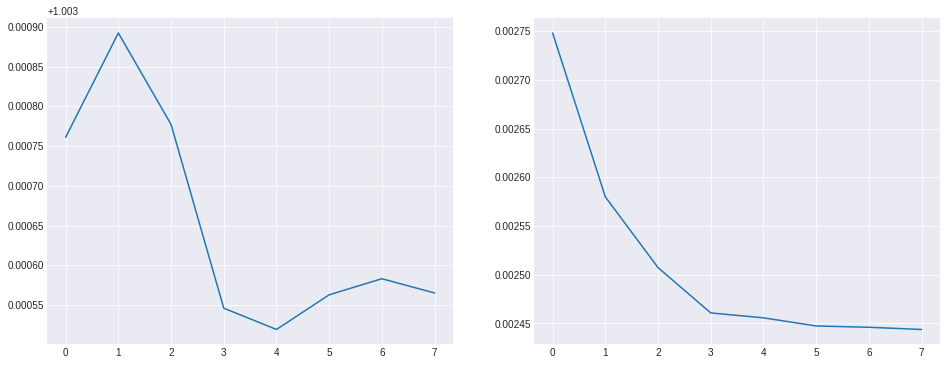

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
ax1.plot(mse_list);
ax2.plot(mse_list_noiseless);

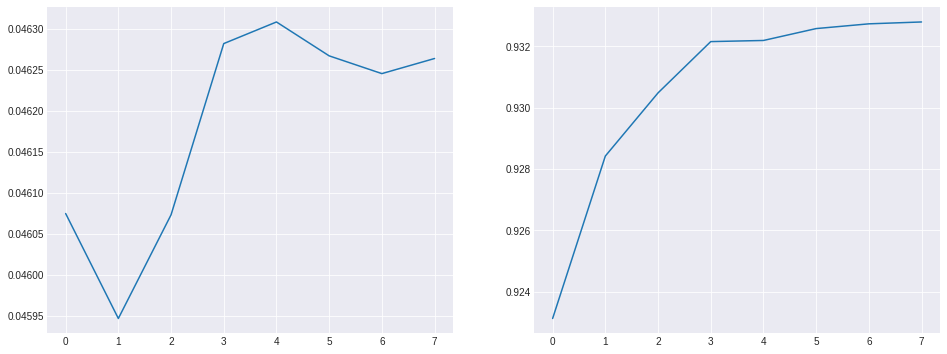

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
ax1.plot(r2_list);
ax2.plot(r2_list_noiseless);